In [ ]:
import pandas as pd
ball_df = pd.read_csv('Ball_By_Ball_Till_2022.csv').iloc[:, 2:]
match_df = pd.read_csv('Matches_Till_2022.csv').iloc[:, 2:]
ball_df

,Team1,Team2,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
0,Rajasthan Royals,Gujarat Titans,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
1,Rajasthan Royals,Gujarat Titans,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
2,Rajasthan Royals,Gujarat Titans,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
3,Rajasthan Royals,Gujarat Titans,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
4,Rajasthan Royals,Gujarat Titans,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
225950,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
225951,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
225952,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


In [ ]:
ball_df['player_out'] = ball_df['player_out'].fillna(0)
ball_df['kind'] = ball_df['kind'].fillna(0)
ball_df['fielders_involved'] = ball_df['fielders_involved'].fillna(0)
ball_df['extra_type'] = ball_df['extra_type'].fillna(0)
match_df['method'] = match_df.method.fillna(0)

# Common values of  Team1 and Team2
team1 = list(ball_df.Team1.unique())
team2 = list(ball_df.Team2.unique())

# Common values of  batting and bowling team
bowlingT = list(ball_df.BowlingTeam.unique())
battingT = list(ball_df.BattingTeam.unique())

# Common values of  Bowler Batter and non-striker
strikers = list(ball_df.batter.unique())
non_s = list(ball_df['non-striker'].unique())
bowler = list(ball_df.bowler.unique())

# Common values of  playerout kind fielders_involved and extra_type
outplayers = list(ball_df.player_out.unique())
kind = list(ball_df.kind.unique())
fielder = list(ball_df.fielders_involved.unique())
extras = list(ball_df.extra_type.unique())

In [ ]:
# Creating new data-frame
bowlers = pd.DataFrame()
bowlers['bowlers'] = bowler
extras_list = []
wkt=[]
balls = []
catches = []
mom = []
matches = []
for i in bowler:
  extras_list.append(sum(ball_df[ball_df['bowler']==i]['extras_run']))
  wkt.append(sum(ball_df[ball_df['bowler']==i]['isWicketDelivery']))
  catches.append(ball_df[ball_df['fielders_involved']==i].shape[0])
  balls.append(ball_df[ball_df['bowler']==i].shape[0])
  mom.append(match_df[match_df['Player_of_Match']==i].shape[0])
  matches.append(len([j for j in match_df['Team1Players'] if i in j])+len([j for j in match_df['Team2Players'] if i in j]))



bowlers['balls'] = balls
bowlers['extras'] = extras_list
bowlers['wickets'] = wkt
bowlers['catches'] = catches
bowlers['mom'] = mom
bowlers['matches'] = matches

ball_df[ball_df['bowler']=='Mohammed Shami']['isWicketDelivery']

0         0
1         0
2         0
3         0
4         0
         ..
147743    0
147744    0
147745    0
147746    0
147747    0
Name: isWicketDelivery, Length: 2118, dtype: int64

In [ ]:
batsman = pd.DataFrame()
batsman['batsman'] = strikers
runs = []
balls = []
matches = []
mom1 = []
six = []
fours = []
singles = []
for i in strikers:
  rows = ball_df[ball_df['batter']==i]['batsman_run']
  runs.append(sum(rows))
  balls.append(len(rows))
  matches.append(len([j for j in match_df['Team1Players'] if i in j])+len([j for j in match_df['Team1Players'] if i in j]))
  mom1.append(match_df[match_df['Player_of_Match']==i].shape[0])
  six.append(len([j for j in rows if j == 6]))
  fours.append(len([j for j in rows if j == 4]))
  singles.append(len([j for j in rows if j == 1]))
batsman['runs'] = runs
batsman['balls'] = balls
batsman['matches'] = matches
batsman['mom'] = mom1
batsman['sixes'] = six
batsman['singles'] = singles
batsman.describe()

,batsman,runs,balls,matches,mom,sixes,singles
0,YBK Jaiswal,547,410,28,1,22,133
1,JC Buttler,2832,1955,84,10,135,629
2,SV Samson,3526,2663,140,9,158,1048
3,D Padikkal,1260,1057,62,1,36,376
4,SO Hetmyer,831,577,56,1,52,210
...,...,...,...,...,...,...,...
600,D Kalyankrishna,3,8,4,0,0,3
601,MA Khote,24,22,4,0,1,8
602,SB Joshi,6,16,4,0,0,6
603,DS Lehmann,18,19,2,0,0,6


In [ ]:
batsman['fours'] = fours
bowlers.describe()

,balls,extras,wickets,catches,mom,matches
count,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,478.716102,32.029661,23.625000,10.737288,1.453390,33.203390
std,699.337108,47.437378,36.027196,17.293975,2.999991,41.796455
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,50.000000,3.000000,2.000000,1.000000,0.000000,5.000000
50%,193.500000,13.000000,9.000000,4.000000,0.000000,15.000000
75%,600.000000,38.000000,30.000000,14.000000,2.000000,44.000000
max,4024.000000,292.000000,207.000000,119.000000,22.000000,227.000000


In [ ]:
# Calculate strike rate
sr = round((batsman.runs/batsman.balls)*100, 2)
# sr = [(i.) for i in sr]
batsman['sr']=sr
batsman

,batsman,runs,balls,matches,mom,sixes,singles,fours,sr
0,YBK Jaiswal,547,410,28,1,22,133,62,133.41
1,JC Buttler,2832,1955,84,10,135,629,278,144.86
2,SV Samson,3526,2663,140,9,158,1048,279,132.41
3,D Padikkal,1260,1057,62,1,36,376,136,119.21
4,SO Hetmyer,831,577,56,1,52,210,55,144.02
...,...,...,...,...,...,...,...,...,...
600,D Kalyankrishna,3,8,4,0,0,3,0,37.50
601,MA Khote,24,22,4,0,1,8,2,109.09
602,SB Joshi,6,16,4,0,0,6,0,37.50
603,DS Lehmann,18,19,2,0,0,6,3,94.74


In [ ]:
# Saving both files
batsman.to_csv('batsman.csv')
bowlers.to_csv('bowlers.csv')

In [ ]:
# Team dataset extracted
feat = ['City', 'Team1', 'Team2', 'Venue', 'TossWinner', 'TossDecision', 'WinningTeam', 'WonBy']
team_df = match_df[feat]
cities = list(team_df.City.unique())
cityDict = {i:cities.index(i) for i in cities}
team1 = list(team_df.Team1.unique())
team1Dict = {i:team1.index(i) for i in team1}
team2 = list(team_df.Team2.unique())
team2Dict = {i:team2.index(i) for i in team2}
venues = list(team_df.Venue.unique())
venuesDict = {i:venues.index(i) for i in venues}
tossW = list(team_df.TossWinner.unique())
tossWDict = {i:tossW.index(i) for i in tossW}
tossDec = list(team_df.TossDecision.unique())
tossDecDict = {i:tossDec.index(i) for i in tossDec}
winTeam = list(team_df.WinningTeam.unique())
winTeamDict = {i:winTeam.index(i) for i in winTeam}
wonmethod = list(team_df.WonBy.unique())
wonbydict = {i:wonmethod.index(i) for i in wonmethod}

# Mapping
team_df.City = team_df.City.map(cityDict)
team_df.Team1 = team_df.Team1.map(team1Dict)
team_df.Team2 = team_df.Team2.map(team2Dict)
team_df.Venue = team_df.Venue.map(venuesDict)
team_df.TossWinner = team_df.TossWinner.map(tossWDict)
team_df.TossDecision = team_df.TossDecision.map(tossDecDict)
team_df.WinningTeam = team_df.WinningTeam.map(winTeamDict)
team_df.WonBy = team_df.WonBy.map(wonbydict)

# Giving Team members
team_df['Team1Members'] = match_df['Team1Players']
team_df['Team2Members'] = match_df['Team2Players']

<ipython-input-43-632b8d484d96>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df.City = team_df.City.map(cityDict)
<ipython-input-43-632b8d484d96>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df.Team1 = team_df.Team1.map(team1Dict)
<ipython-input-43-632b8d484d96>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

<ipython-input-44-cc9f7cc8e601>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Team1'] = match_df.Team1
<ipython-input-44-cc9f7cc8e601>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Team2'] = match_df.Team2


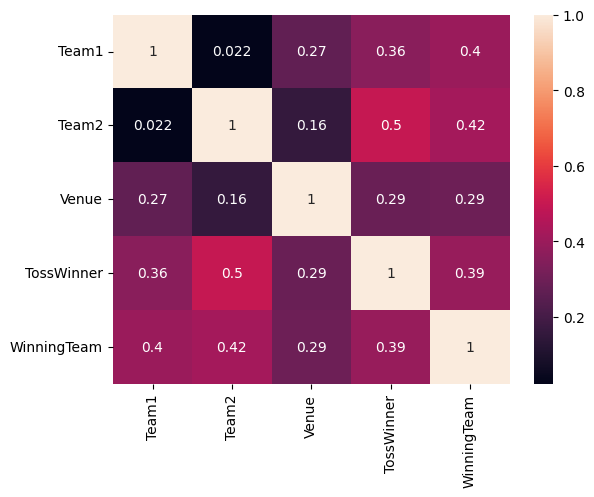

In [ ]:
import seaborn as sns
sns.heatmap(team_df.iloc[:, :-2].drop(['WonBy', 'TossDecision', 'City'], axis = 1).corr(), annot = True)
# Final data
team_df['Team1'] = match_df.Team1
team_df['Team2'] = match_df.Team2
final_team_data = team_df[[i for i in team_df.columns if i not in ['WonBy', 'TossDecision', 'City']]]
final_team_data.to_csv('team_data.csv')

In [ ]:
final_team_data

,Team1,Team2,Venue,TossWinner,WinningTeam,Team1Members,Team2Members
0,Rajasthan Royals,Gujarat Titans,0,0,0,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan..."
1,Royal Challengers Bangalore,Rajasthan Royals,0,0,1,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."
2,Royal Challengers Bangalore,Lucknow Super Giants,1,1,2,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda..."
3,Rajasthan Royals,Gujarat Titans,1,2,0,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan..."
4,Sunrisers Hyderabad,Punjab Kings,2,3,3,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',..."
...,...,...,...,...,...,...,...
945,Mumbai Indians,Royal Challengers Bangalore,15,4,2,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '..."
946,Kolkata Knight Riders,Deccan Chargers,19,16,8,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma..."
947,Delhi Daredevils,Rajasthan Royals,25,0,12,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'..."
948,Kings XI Punjab,Chennai Super Kings,32,5,9,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh..."


In [ ]:
bowlers.describe()['catches']

count    472.000000
mean      10.737288
std       17.293975
min        0.000000
25%        1.000000
50%        4.000000
75%       14.000000
max      119.000000
Name: catches, dtype: float64